MASIV stack is downsampled : 7.0, The masiv stack is : 7.0 um/pixels
new shape of the data is  x y z= (534, 572, 420)


C:\Users\liu\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: GF235R_25um.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


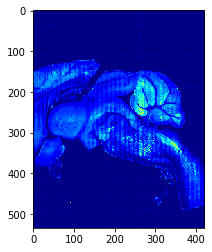

In [6]:
import os

import tkinter as tk
import tkinter.filedialog as fdialog
from tkinter import simpledialog

import skimage
from skimage import io
from skimage import transform as tf

import numpy as np

import matplotlib.pyplot as plt

stack=fdialog.askopenfile(initialdir='Z:\\', title='select the MaSIVed stack to be further downsampled').name                               

xy = 1
z = 5
goal_xyz = 25

outdir = fdialog.askdirectory(title='Please select the output directory')

masiv_ds=stack[stack.find('_DS')+len('_DS'):stack.rfind('.tif')]
masiv_ds=float(masiv_ds)
masiv_xy= round (xy*masiv_ds,2)
print (f'MASIV stack is downsampled : {masiv_ds}, The masiv stack is : {masiv_xy} um/pixels') 

ratioxy= round (goal_xyz/masiv_xy, 3)
ratioz=goal_xyz/z

message = (f"Sample resolution is {xy, xy, z} um in x y z. "
f"downsampling to {goal_xyz} um. "
f"dowmsample ratio is xy = {ratioxy} and z = {ratioz}.")

message

im = io.imread(stack)
#reads the entire image stack into memory (huge, takes about 5min to read a 25gb stack)

z,y,x= im.shape

new_rows=int(y/ratioxy)
new_col=int(x/ratioxy)
new_z=int(z/ratioz)
tifarray = np.zeros([new_rows, new_col, z])

print( f'new shape of the data is  x y z= {new_rows, new_col, new_z}')

for i in range (z):
    new_xyplane=tf.resize(im[i,:,:],[new_rows, new_col], order=1, anti_aliasing=1)
    tifarray[:,:,i]= new_xyplane

plt.imshow(tifarray[:,:,136])
del im


tifarray2 = np.zeros([new_rows, new_col, new_z])

if ratioz==1:
    print('z axis is not downsampled')
    tifarray2=tifarray
else:
    tifarray2 = np.zeros([new_rows, new_col, new_z])
    for i in range (new_rows):
        new_xyplane=tf.resize(tifarray[i,:,:], [new_col, new_z], order=0, anti_aliasing=0)
        tifarray2[i,:,:,]= new_xyplane

del tifarray

plt.jet()
plt.imshow(tifarray2[:,300,:])

imguint16=skimage.img_as_uint(tifarray2)

coronal_planetmp= np.swapaxes(imguint16,0,2)
coronal_plane= np.swapaxes(coronal_planetmp,1,2)

out_name= outdir[3:8]+ outdir[9]+f'_{goal_xyz}um.tiff'
out_name

os.chdir(outdir)
io.imsave(out_name, coronal_plane)